In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Inverse Kinematics calculations
def calculate_inverse_kinematics(P_x, P_y, P_z, a2, a3, d1, d5):
    # Calculate wrist center position
    W_x = P_x
    W_y = P_y
    W_z = P_z + d5

    # Calculate theta_1
    theta_1 = np.degrees(np.arctan2(W_y, W_x))

    # Calculate r and s
    r = np.sqrt(W_x**2 + W_y**2)
    s = W_z - d1

    # Calculate D
    D = (r**2 + s**2 - a2**2 - a3**2) / (2 * a2 * a3)

    # Check if the point is reachable
    if np.abs(D) > 1:
        raise ValueError("The target position is not reachable.")

    # Calculate theta_3
    theta_3 = np.degrees(np.arctan2(np.sqrt(1 - D**2), D))

    # Calculate theta_2
    theta_2 = np.degrees(
        np.arctan2(s, r)
        - np.arctan2(
            a3 * np.sin(np.radians(theta_3)), a2 + a3 * np.cos(np.radians(theta_3))
        )
    )

    # Calculate theta_4
    theta_4 = 0  # Assuming no rotation at the wrist

    return theta_1, theta_2, theta_3, theta_4

In [4]:

# Denavit-Hartenberg (DH) Parameters
d1, a1, alpha1 = 0.1, 0, 90
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, 90
d5, a5, alpha5 = 0.1, 0, 0

In [5]:

# Denavit-Hartenberg (DH) Parameters
d1, a1, alpha1 = 0.1, 0, 90
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, 90
d5, a5, alpha5 = 0.1, 0, 0

In [7]:
# Target end-effector position
P_x = 0.883012701892219
P_y = 0
P_z = -0.236602540378444

In [8]:
# Calculate joint angles
theta_1, theta_2, theta_3, theta_4 = calculate_inverse_kinematics(P_x, P_y, P_z, a2, a3, d1, d5)
theta_5 = 0  # Assuming no rotation at the end-effector
theta_degrees = [theta_1, theta_2, theta_3, theta_4, theta_5]

In [9]:
# DH parameters for each joint based on the provided values
dh_parameters = [
    {"theta": theta_degrees[0], "d": d1, "a": a1, "alpha": alpha1},  # Link 1
    {"theta": theta_degrees[1], "d": d2, "a": a2, "alpha": alpha2},  # Link 2
    {"theta": theta_degrees[2], "d": d3, "a": a3, "alpha": alpha3},  # Link 3
    {"theta": theta_degrees[3], "d": d4, "a": a4, "alpha": alpha4},  # Link 4
    {"theta": theta_degrees[4], "d": d5, "a": a5, "alpha": alpha5},  # Link 5
]

In [10]:
# Function to create a transformation matrix using Denavit-Hartenberg parameters
def DH_matrix(theta, d, a, alpha):
    theta_rad = np.radians(theta)
    alpha_rad = np.radians(alpha)
    return np.array(
        [
            [
                np.cos(theta_rad),
                -np.sin(theta_rad) * np.cos(alpha_rad),
                np.sin(theta_rad) * np.sin(alpha_rad),
                a * np.cos(theta_rad),
            ],
            [
                np.sin(theta_rad),
                np.cos(theta_rad) * np.cos(alpha_rad),
                -np.cos(theta_rad) * np.sin(alpha_rad),
                a * np.sin(theta_rad),
            ],
            [0, np.sin(alpha_rad), np.cos(alpha_rad), d],
            [0, 0, 0, 1],
        ]
    )

In [12]:
# Compute the transformation matrix numerically
T_numerical = np.eye(4)
positions = [np.array([0, 0, 0, 1])]  # Base position
for params in dh_parameters:
    T_numerical = T_numerical @ DH_matrix(params["theta"], params["d"], params["a"], params["alpha"])
    positions.append(T_numerical[:3, 3])

# Extract the position and orientation from the final transformation matrix
x, y, z = T_numerical[0, 3], T_numerical[1, 3], T_numerical[2, 3]
orientation = T_numerical[:3, :3]


In [13]:
# Display results
print("Position of the End Effector (x, y, z):")
print(f"x = {x}, y = {y}, z = {z}\n")

print("Orientation Matrix of the End Effector:")
print(orientation)

print("\nNumerical Evaluation of the Transformation Matrix:")
print(T_numerical)

# Print calculated joint angles for reference
print("\nCalculated Joint Angles (in degrees):")
print(f"Theta 1: {theta_1} degrees")
print(f"Theta 2: {theta_2} degrees")
print(f"Theta 3: {theta_3} degrees")
print(f"Theta 4: {theta_4} degrees")
print(f"Theta 5: {theta_5} degrees")

Position of the End Effector (x, y, z):
x = 0.8985061539611051, y = -2.6660255543585587e-17, z = -0.23539501449964992

Orientation Matrix of the End Effector:
[[ 9.87924741e-01 -9.48700324e-18  1.54934521e-01]
 [ 9.48700324e-18 -1.00000000e+00 -1.21725284e-16]
 [ 1.54934521e-01  1.21725284e-16 -9.87924741e-01]]

Numerical Evaluation of the Transformation Matrix:
[[ 9.87924741e-01 -9.48700324e-18  1.54934521e-01  8.98506154e-01]
 [ 9.48700324e-18 -1.00000000e+00 -1.21725284e-16 -2.66602555e-17]
 [ 1.54934521e-01  1.21725284e-16 -9.87924741e-01 -2.35395014e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Calculated Joint Angles (in degrees):
Theta 1: 0.0 degrees
Theta 2: -38.9129986887448 degrees
Theta 3: 47.82599737748956 degrees
Theta 4: 0 degrees
Theta 5: 0 degrees


In [14]:

# Verify calculations by comparing the calculated end-effector position with the target
def verify_calculations(P_x, P_y, P_z, x, y, z, tolerance=1e-1):
    if np.allclose([P_x, P_y, P_z], [x, y, z], atol=tolerance):
        print("The calculated end-effector position is correct.")
    else:
        print("There is a discrepancy in the end-effector position.")
        print(f"Expected: x = {P_x}, y = {P_y}, z = {P_z}")
        print(f"Calculated: x = {x}, y = {y}, z = {z}")

verify_calculations(P_x, P_y, P_z, x, y, z)

The calculated end-effector position is correct.


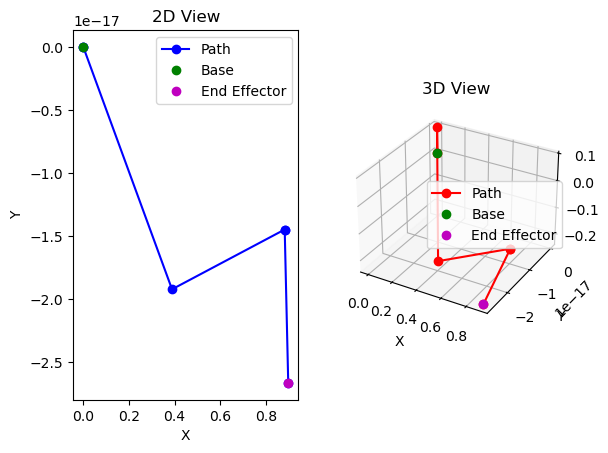

In [15]:

# Plotting the robot configuration
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

# 2D plot
x_vals = [pos[0] for pos in positions]
y_vals = [pos[1] for pos in positions]
ax1.plot(x_vals, y_vals, "bo-")
ax1.plot(x_vals[0], y_vals[0], "go")  # Base in green
ax1.plot(x_vals[-1], y_vals[-1], "mo")  # End effector in magenta
ax1.set_title("2D View")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.legend(["Path", "Base", "End Effector"])

# 3D plot
x_vals = [pos[0] for pos in positions]
y_vals = [pos[1] for pos in positions]
z_vals = [pos[2] for pos in positions]
ax2.plot(x_vals, y_vals, z_vals, "ro-")
ax2.plot(x_vals[0], y_vals[0], z_vals[0], "go")  # Base in green
ax2.plot(x_vals[-1], y_vals[-1], z_vals[-1], "mo")  # End effector in magenta
ax2.set_title("3D View")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.legend(["Path", "Base", "End Effector"])

plt.show()